# day 197,day 198,day 220,day 224

In [2]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# projections in R^2(a vector projection)

# how to project a 'point' onto a 'line'? (we are casting points onto the line)

# mechanism:
$$ a^{T} \left(b-a \beta \right) = 0 \rightarrow \text{sidenote: 0 because it is perpendicular (dot product of a vector and its orthogonal version is = 0) }$$
$$ \downarrow $$
$$ a^{T}b  - a^{T} a \beta  = 0 $$
$$ \downarrow $$
$$ a^{T} a \beta =  a^{T}b $$
$$ \downarrow $$
$$ \beta = \frac{a^T b}{a^T a} $$
$$ \downarrow $$
$$ \beta = \frac{\text{mapping} }{\text{magnitude} } $$

* a is the `basis vector`.
* b is the point in space.
* beta is the scaler or locater of b in space which slides across a to locate b to connect to.
* beta is the scaler of a that can increase or decrease the magnitude of a.
* = 0 is because the point and the line are orthogonal.
* beta moves across the line a to make orthogonal connection with the point b in space, so beta is not only a scaler but a connector,resource locater, a dynammic pipe that can slide across the space(a in our case).
* the connecting line is called line of `projection`.
* **beta only connects to b when it is orthogonal (90 degree) from a. this is the constraint.**

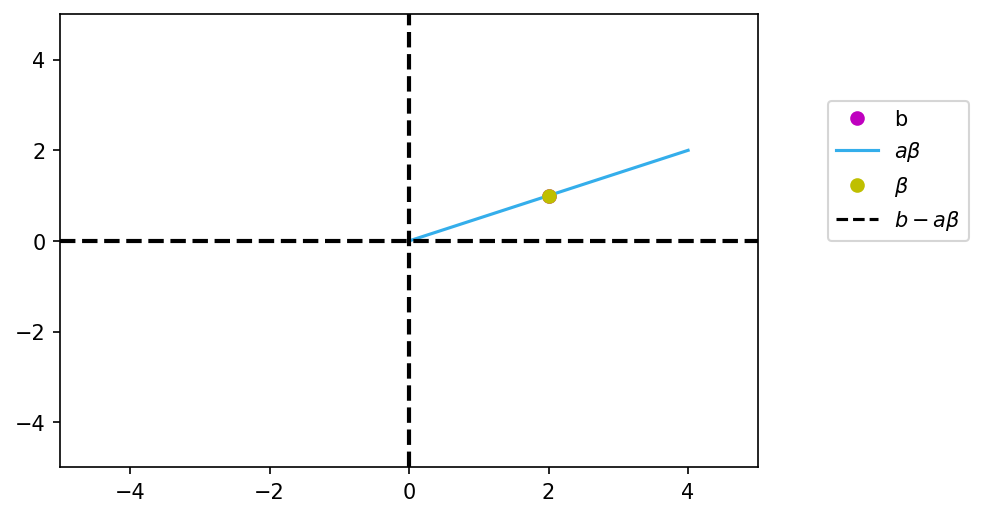

In [9]:
# visual graphic of the above said concept: 
'''we are trying project the point b onto a. But first we need to find the orthogonal line that connects a with b through
beta(the scaler of a)'''

# the point b
b = np.array([2,1])

# the line a:(the basis vector)
a = np.array([4,2])

# beta(the scaler of a)
beta = (a.T @ b) / (a.T @ a)

point_of_connection = a*beta

connecting_line = [b[0],a[0]*beta],[b[1],a[1]*beta]


# plotting
plt.figure(dpi=150)

# plotting the point
plt.plot(b[0],b[1],'mo',label='b')

# plotting the line
plt.plot([0,a[0]],[0,a[1]],color='#34aeeb',label='$ a \\beta $')

# plotting the point_of_connection
plt.plot(point_of_connection[0],point_of_connection[1],'yo',label='$  \\beta $')

# drawing the line from point_of_connection to b which is the connecting line(0.8,4),(2.24,1)
plt.plot([b[0],a[0]*beta],[b[1],a[1]*beta],'k--',label='$ b- a \\beta $')


# decoration to improve aesthetics of the plot
plt.xlim(-5,5)
plt.ylim(-5,5)

# origin lines
axes = plt.gca()
plt.plot(axes.get_xlim(),[0,0],'k--',linewidth=2)
plt.plot([0,0],axes.get_ylim(),'k--',linewidth=2)


plt.legend(loc=(1.1,0.5))
plt.show()

# exploration,analysis and freethrows

In [10]:
beta

In [75]:
connecting_line

([4, 0.896551724137931], [1, 2.2413793103448274])

In [54]:
point_of_connection

array([0.89655172, 2.24137931])

In [58]:
b

array([4, 1])

In [6]:
a[0]*beta

In [7]:
a[1]*beta

# projections in R^N(a matrix/tensor projection)

# how to project a point(s) onto a matrix or a tensor of more than 3 dimensions?

$$ A^{T}\left(b-A \beta \right) \rightarrow \text{ step 1}  $$
$$ \downarrow $$
$$ a^{T}b  - a^{T} a \beta  = 0 \rightarrow \text{ step 2} $$
$$ \downarrow $$
$$ a^{T} a \beta =  a^{T}b  \rightarrow \text{ step 3}$$
$$ \downarrow $$
$$ \left(a^{T} a \right)^{-1} a^{T} a \beta = \left(a^{T} a \right)^{-1}  a^{T}b  \rightarrow \text{ step 4}$$
$$ \downarrow $$
$$ \text{Identity . } \beta = \left(a^{T} a \right)^{-1}  a^{T}b  \rightarrow \text{ step 5}$$
$$ \downarrow $$
$$  \beta = \left(a^{T} a \right)^{-1}  a^{T}b  \rightarrow \text{ step 6}$$
$$ \downarrow $$
$$  \beta =  a^{-1} a^{-T}  a^{T}b  \rightarrow \text{ step 7}$$
$$ \downarrow $$
$$  \beta =  a^{-1}b  \rightarrow \text{ step 8}$$



* the difference here is that A is a matrix, in the previous problem A was a vector. Beta is a vector, in the previous problem it was a scaler.
* in step 3: a^T a is an entire matrix, in the previous problem it was just a number we divided the number from the right side to find the solution for beta, so you cannot simply simply a matrix with another matrix, so we find its inverse.
* in step 4:  we multiplied each side with (a^T a)^-1 to find the solution for beta.
* in step 5: the left side is equal to identity matrix only if it passes the condition that the matrix must be either be `square` or must have `full column rank` that is in the shape like (3,2) or (5,4) etc. a matrix of size (2,8) won't be valid to become a identity matrix on the left. and Identity matrix on the left is what we require to find the solution for beta.
* in step 6: dot(identity,beta) gives the beta because beta is a vector(having answers only in the diagonal position of the matrix A), so dot(identity,beta) gives just beta.
* in step 7: we are applying the `LIVE = EVIL` rule to those within the bracket
* in step 8: a^{-T} and a^{T} cancel each other out.


# interpretation:

$$ a^{T} a \beta =  a^{T}b \rightarrow \text{ step1} $$
$$ \downarrow $$
$$ \text{Matrix } \beta = \text{vector } \rightarrow  \text{ step2} $$
$$ \downarrow $$
$$  \beta = \text{Matrix }^{-1} \text{vector } \rightarrow  \text{ step3} $$



* in step 2: we said a^T a as matrix; and  a^T b as vector
* in step 2: the vector is in the column space of the matrix.
* in step3:  we can find the value for beta only this way given that we are dealing with a matrix. division is not permissible with matrices only inverse, so whenever you would normally consider division with scalers do inverse with Matrix.
* ultimately our goal is to find what weighted combination of beta and the matrix would result in vector on the right side. that is what weighted combination of beta and the matrix a would produce the vector b.

In [72]:
# illustration in code:

# setting the sizes:(mind you! rows need to be >= cols to get full column rank matrix otherwise we may fail!! )
rows = 3
cols = 2

# getting the b vector: # it doesn't matter whether it is a matrix or a vector or a tensor as long as the inner dimensions 
vector = np.random.randint(1,9,(rows,1))

# getting the matrix:
matrix = np.random.randint(1,9,(rows,cols))

# printing the matrix and the vector
print('matrix')
print(matrix)
print('------')
print('vector')
print(vector)


# find for beta: beta = (A^T @ A)^-1 @ (A^T @ b):
beta1 = np.linalg.inv(matrix.T @ matrix) @ (matrix.T @ vector)

# find beta using optimal code:
beta2 = np.linalg.solve(matrix.T@matrix, matrix.T@vector) 

print('------')
print('this is beta1')
print(beta1)
print('-----')
print('this is beta2')
print(beta2)

# finding the solution A@beta
matrix_beta = matrix@beta2 # A@beta = b

print('-------')
print('this is matrix beta')
print(matrix_beta)

matrix
[[4 7]
 [8 7]
 [3 7]]
------
vector
[[2]
 [4]
 [2]]
------
this is beta1
[[0.42857143]
 [0.07482993]]
-----
this is beta2
[[0.42857143]
 [0.07482993]]
-------
this is matrix beta
[[2.23809524]
 [3.95238095]
 [1.80952381]]


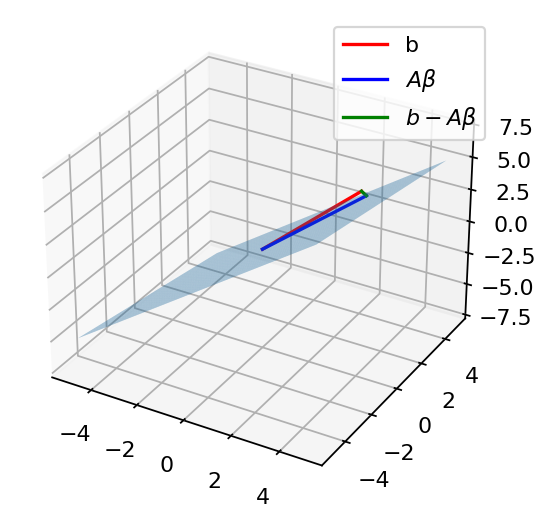

' the plane can infinitely expand in all four directions but the point at which it needs to stop expanding to connect \n    with the vector b is determined by the beta(the scaler of the matrix)'

In [73]:
# lets see how the projection works in plot
fig = plt.figure(dpi=159)
ax = fig.add_subplot(111,projection='3d')

# plot the vectors beta and A@beta

# vector from origin
ax.plot([0,vector[0,0]],[0,vector[1,0]],[0,vector[2,0]],'r',label='b')

# matrix beta from origin
ax.plot([0,matrix_beta[0,0]],[0,matrix_beta[1,0]],[0,matrix_beta[2,0]],'b',label='$ A \\beta $') # this is the connector

# plot the projection line
ax.plot([matrix_beta[0,0],vector[0,0]],
        [matrix_beta[1,0],vector[1,0]],
        [matrix_beta[2,0],vector[2,0]],'g',label='$ b - A \\beta   $')


# draw a plane 

# steps to draw a plane
'''1. find the meshgrid of xx and yy of any random points
   2. find the cross product of the matrix you want to draw the plane for
   3. find zz axis using (-cp[0]*xx -cp[1]*yy)* 1./cp[2]
   4. plot_surface (xx,yy,zz)'''

xx,yy = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100)) # size of the plane is determined by what you put in here
cp = np.cross(matrix[:,0],matrix[:,1])
zz = (-cp[0]*xx -cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,zz,alpha=0.4)

plt.legend()
plt.show()

"""vector is not in the span of the matrix plane that's why it's protruding out"""
''' the plane can infinitely expand in all four directions but the point at which it needs to stop expanding to connect 
    with the vector b is determined by the beta(the scaler of the matrix)'''

# conclusion: we cannot perform the projection of point/vector/matrix/tensor onto a matrix if the matrix has a full-row rank not full-column rank or full-rank.

* if the matrix has full row rank we may have to perform right inverse which cannot help in connnecting the matrix with the point.
* **only left inverse is allowed.**

# exploration,analysis and freethrows

In [44]:
matrix

array([[8, 2],
       [7, 7],
       [1, 3]])

In [43]:
matrix[:,0]

array([8, 7, 1])

In [45]:
matrix[:,1]

array([2, 7, 3])

In [46]:
np.cross(matrix[:,0],matrix[:,1])

array([ 14, -22,  42])

In [34]:
np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))

[array([[-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        ...,
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ]]),
 array([[-2.        , -2.        , -2.        , ..., -2.        ,
         -2.        , -2.        ],
        [-1.91836735, -1.91836735, -1.91836735, ..., -1.91836735,
         -1.91836735, -1.91836735],
        [-1.83673469, -1.83673469, -1.83673469, ..., -1.83673469,
         -1.83673469, -1.83673469],
        ...,
        [ 1.83673469,  1.83673469,  1.83673469, ...,  

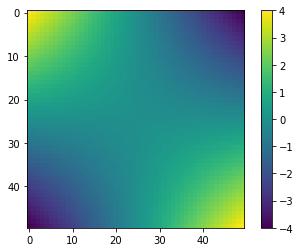

In [38]:
xx,yy = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))

matrix = xx*yy

plt.imshow(matrix)
plt.colorbar()
plt.show()

In [8]:
b

array([[2],
       [6],
       [6]])

In [9]:
a

array([[2, 1],
       [7, 1],
       [2, 8]])

In [10]:
beta1

array([[0.77398789],
       [0.55530762]])

In [11]:
beta2

array([[0.77398789],
       [0.55530762]])

# day 228

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

In [2]:
# verify whether v.T . w = w.T . v

v = np.array([15,2])
w = np.array([5,5])

display(v.T@w)
display(w.T@v)

# conclusion: it is True.

85

85

# orthogonal and parallel vectors:

![vector_space_chunking](images/vector_space_chunking.png)

# Explanation:
* The goal is to find the length or the magnitude of the target vector(W) by using a reference vector(V).
* The reference vector helps find the vectors that are `parallel` and `perpendicular` to the target vector.
* The combination of vectors that are parallel to the target vector and perpendicular to the target vector get us to draw a chunck of space around the target vector that will calculate the magnitude of the target vector.
* in this whole process the reference vector is the true helper the basis vector because it is what helps us find the vectors that are parallel and perpendicular to the target vectors.


# computing the parallel vector:

* The parallel vector is parallel to the reference vector lets call our reference vector as the basis vector from here on.
* The parallel vector has the same magnitude as the target vector(W) but points at the same direction as the basis vector(V). same direction means parallel. 
* `the parallel vector is = projection of w onto v = mapping * basis vector / magnitude.`
* $$ \text{ the parallel vector is = } proj_v w = \frac{v^{T} w}{v^{T} v} * v $$


![parallel vector by Mike x Cohen](images/parallel_vector.png)


# computing the perpendicular vector:

* The perpendicular vector is perpendicular to the basis vector but has the same magnitude as the target vector.
* the perpendicular vector = w - the parallel vector. 
* This operation is valid only if the parallel vector and the perpendicular vectors are orthogonal meaning their dot product equals 0, parallel.T @ perpendicular = 0

# proving w_perpendicular to v and w_parallel to  v are orthogonal:

$$ \text{parallel^T perpendicular = } \left(\frac{v^Tw}{v^Tv} v \right)^T . \left(w - \left(\frac{v^Tw}{v^Tv} v \right) \right) $$

$$ = \frac{v.w^T v^T}{v.v^T} . \left(w - \frac{v^T.w}{v^Tv} v \right) $$

$$ = \frac{v.v^T.w^T}{v.v^T} . \left(w - \frac{v^T.v w}{v^Tv}  \right) $$

$$ = \frac{v^T.v}{v^T.v} = 1 $$

$$ = w^T.w - w^T.w $$

$$ = 0 $$


In [3]:
# proving v.T v/ v.T v = 1
v = np.array([4,0])
(v.T@v)/(v.T@v)

They are orthogonal


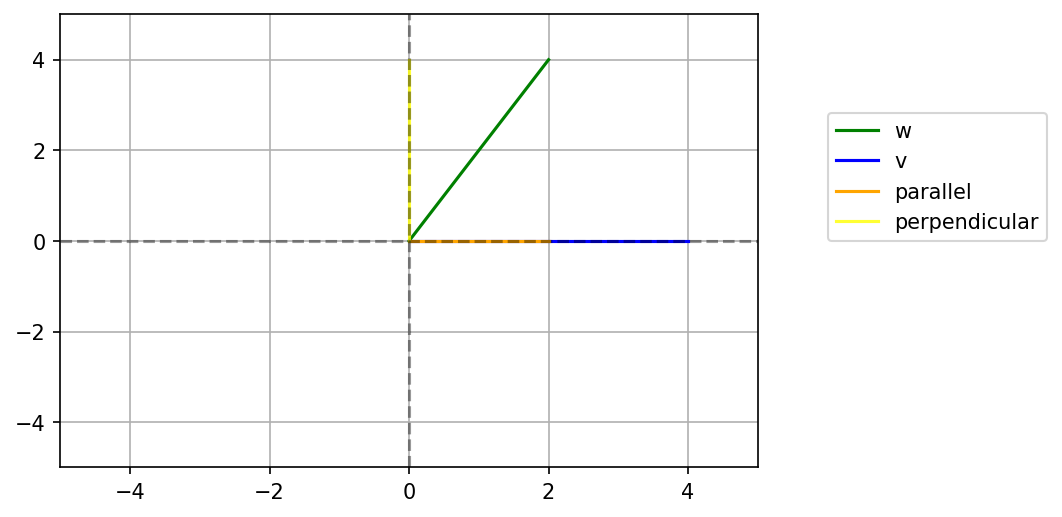

In [4]:
# put things to work.
v = np.array([4,0])
w = np.array([2,4])

w_parallelto_v = (v.T@w)/(v.T@v) * v # remember this attached v is hadammard multiplied.
w_perpendicularto_v = w - w_parallelto_v

# checking the orthogonality of parallel and perpendicular vectors
if np.dot(w_parallelto_v,w_perpendicularto_v) == 0:
    print('They are orthogonal')

    
# plotting them;
plt.figure(dpi=150)

# plot the v and w
plt.plot([0,w[0]],[0,w[1]],'g',label='w')
plt.plot([0,v[0]],[0,v[1]],'b',label='v')

# plot the parallel and perpendicular
plt.plot([0,w_parallelto_v[0]],[0,w_parallelto_v[1]],color='orange',label='parallel')
plt.plot([0,w_perpendicularto_v[0]],[0,w_perpendicularto_v[1]],color='yellow',alpha=0.8,label='perpendicular')

# beatifying the plot
plt.xlim(-5,5)
plt.ylim(-5,5)
axes = plt.gca()
plt.plot(axes.get_xlim(),[0,0],'k--',alpha=0.4)
plt.plot([0,0],axes.get_ylim(),'k--',alpha=0.4)
plt.grid()
plt.legend(loc=(1.1,0.5))

plt.show()

# using pythogoras formula to calculate magnitude of w (a^2 + b^2 = c^2)
 

In [5]:
w_parallelto_v + w_perpendicularto_v

array([2., 4.])

In [6]:
w

array([2, 4])

# day 231

In [2]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# code challenge: decompose vector to orthogonal components.

decompose means: break the system into simpler components

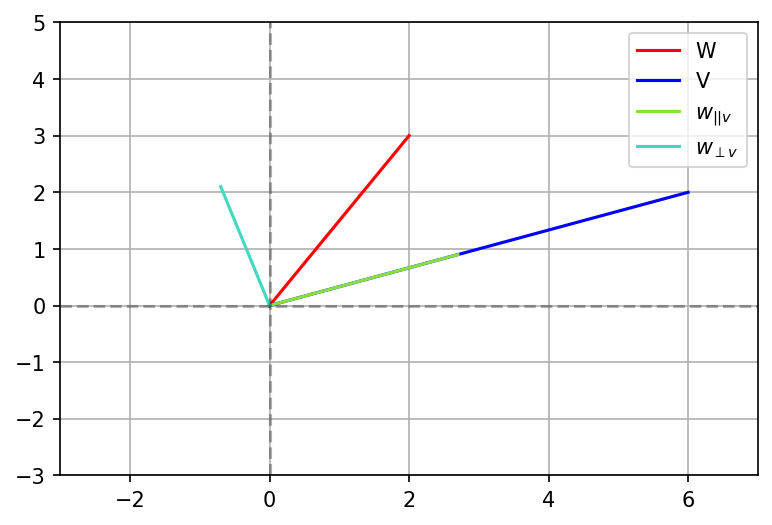

In [22]:
# vector w, to be decomposed into parallel and perpendicular vectors.
w = np.array([2,3])

# vector v, the reference (the basis)
v = np.array([6,2])

# compute w parallel to v
w_parallelto_v = (v.T@w)/(v.T@v) * v

# compute w perpendicular to v
w_perpendicularto_v = w - w_parallelto_v

# confirm the results algebraically:
confirmation_boolean = np.equal(w_perpendicularto_v + w_parallelto_v,w)

# plot all four vectors:
plt.figure(dpi=150)
plt.plot([0,w[0]],[0,w[1]],'r',label='W')
plt.plot([0,v[0]],[0,v[1]],'b',label='V')
plt.plot([0,w_parallelto_v[0]],[0,w_parallelto_v[1]],color='#88e03f',label='$w_{||v} $')
plt.plot([0,w_perpendicularto_v[0]],[0,w_perpendicularto_v[1]],color='#43d9c0',label='$ w_{\\perp v} $')



plt.xlim([-3,7])
plt.ylim([-3,5])
axes = plt.gca()
plt.plot(axes.get_xlim(),[0,0],'k--',alpha=0.3)
plt.plot([0,0],axes.get_ylim(),'k--',alpha=0.3)
plt.grid()


plt.legend()
plt.show()

# orthogonal matrices

# what it means for a matrix to be orthogonal?
1. orthogonal matrix is denoted with the letter 'Q'.
2. All columns are PairWise orthogonal.
3. Each column has magnitude exactly = 1.
4. An identity matrix is an orthogonal matrix.

![formal definition](images/orthogonal_matrix1.png)
* the dot product of qi and qj is 1 if i = j that means you are computing the dot product of the column with itself.
* the dot product of qi and qj is 0 if i != j that means `you are computing the dot product between two different columns and the result would be zero`.

# $$ q^{T}. q = I  \rightarrow q^{-1} .q = I \rightarrow q^{T} = q^{-1}$$

# for square orthogonal matrix:
$$ q^{T} . q =  q^{-1}. q =  q . q^{T} = q . q^{-1} = I $$

# for non-square orthogonal matrix:
$$ q^{T} . q =  q^{-1} . q  = I $$

# orthogonal matrix contains rotational vectors:
* orthogonal matrix when rotated will just get rotated to the specified direction without getting streched or in other words it won't see any increase in magnitude. see the matrix multiplication lecture for lessons on rotations.

In [36]:
# example for orthogonal matrix

q = 1/sym.sqrt(2)* sym.Matrix([[1,-1],
                               [1,1]])

print('This is the orthogonal Matrix: ')
display(q)

samecol_dot1 = q[:,0].dot(q[:,0])
print('When we compute the dot product for the first column with itself: ')
display(samecol_dot1)

samecol_dot2 = q[:,1].dot(q[:,1])
print('When we compute the dot product for the second column with itself:  ')
display(samecol_dot2)

col1_col2_dot = q[:,0].dot(q[:,1])
print('When we compute the dot product of the first and second column:  ')
display(col1_col2_dot)

print('Hence this matrix is orthogonal')

This is the orthogonal Matrix: 


⎡√2  -√2 ⎤
⎢──  ────⎥
⎢2    2  ⎥
⎢        ⎥
⎢√2   √2 ⎥
⎢──   ── ⎥
⎣2    2  ⎦

When we compute the dot product for the first column with itself: 


When we compute the dot product for the second column with itself:  


When we compute the dot product of the first and second column:  


Hence this matrix is orthogonal


# conclusion: Hence it is proven that if we compute dot product for the same column we get 1 and if we compute dot product between two different columns we get 0 hence it proven that this matrix is indeed orthogonal!!! 

In [5]:
# example 2: non-square orthogonal matrix

q = 1/3 * sym.Matrix([[2, 1],
                      [-2, 2],
                      [1, 2]])

print('This is the orthogonal Matrix: ')
display(q)

samecol_dot1 = q[:,0].dot(q[:,0])
print('When we compute the dot product for the first column with itself: ')
display(samecol_dot1)

samecol_dot2 = q[:,1].dot(q[:,1])
print('When we compute the dot product for the second column with itself:  ')
display(samecol_dot2)

col1_col2_dot = q[:,0].dot(q[:,1])
print('When we compute the dot product of the first and second column:  ')
display(col1_col2_dot)

print('Hence this matrix is orthogonal')

This is the orthogonal Matrix: 


⎡0.666666666666667   0.333333333333333⎤
⎢                                     ⎥
⎢-0.666666666666667  0.666666666666667⎥
⎢                                     ⎥
⎣0.333333333333333   0.666666666666667⎦

When we compute the dot product for the first column with itself: 


When we compute the dot product for the second column with itself:  


When we compute the dot product of the first and second column:  


Hence this matrix is orthogonal


# day 236

In [5]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# Gram-Schmidt procedure:

* the goal is to convert any matrix into orthogonal matrix (where each dot product of each column would equal 0 and the norm of each column would equal 1).

# procedure for orthogonalization(orthogonalization is calculating the values for the vector that is perpendicular to reference vector).
* step1: take the first column and put it as it is. and normalize it by taking the norm of the components and 1/norm.
* step2: take the second column and orthogonalize it by referencing the first column. and normalize it by taking the norm of the components and 1/norm.
* step3: take the third column and orthogonalize it by referencing first,second columns and normalize it by taking the norm of the components and 1/norm.
* step4: take the fourth column and orthogonalize it by referencing first,second,third columns, and normalize it by taking the norm of the components and 1/norm.
* step5: repeat the above the procedures till you run out of columns. 

# procedure in equation:
$$  \text{step 1: } \text{col1 }* \frac{1}{\text{norm of weights of col1}} $$
$$ \downarrow $$
$$  \text{step 2: } \text{col2} - \text{col2 }_{ \parallel \text{orthogonal col1} } *  \frac{1}{\text{norm of weights of `results` of col2}} $$
$$ \downarrow $$
$$  \text{step 3: } \text{col3} - \text{col3 }_{ \parallel \text{ orthogonal col2} } - \text{col3 }_{ \parallel \text{orthogonal col1} }  *  \frac{1}{\text{norm of weights of `results` of col3}} $$
$$ \downarrow $$
$$ \text{ repeat this procedure until the end of the  matrix } $$


# notes about square and non-square and orthogonalization:
* in a square matrix, lets say of size 2x2, after orthogonalization you will have two non-trivial columns that are orhtogonal to each other.
* in a non-square matrix, lets say of size 2x3, after orthogonalization you will have two non-trivial columns, the third column may only have [0,0] vector. 
* the process of orthogonalization zero-fills all the extra redundant dimensions.

# visual inspection:
![bah bah black sheep](images/gram_schmidt.png)

* col3 just shrunk to zero
* all columns are rotated a little bit(to 90 deg exactly).

# caveats of gram-schmidt orthogonalization:
* there is an information loss in the third column. it just became zero. it went to oblivion. the point of no return.
* orthogonalizing a matrix using this procedure might irreversibly lose the extra dimensional information. once you get the Q(orthogonal matrix) with gram-schmidt you cannot get back to the original matrix and you may have potentially lost some information if the matrix was not square or had linearly dependent rows.
* that's why we use QR decomposition. Q is calculated. R is calculated seperately. when you matmultiply the Q with R you will get back the original matrix. Thus Information is preserved.

In [8]:
# preparing the matrix
a = sym.Matrix([[1,2,3],
                [4,5,6]])
display(Math('\\text{Original Matrix: } %s'%(sym.latex(a))))

# producing orthogonal col1,col2,col3
col1 = 1/a[:,0].norm() * a[:,0]
display(Math('\\text{col1: } %s'%(sym.latex(col1))))

# col perp(orthogonal) = col - col parallel, col parallel = col1T.col2/col1T.col1 * col1
col2 =  a[:,1] - (col1.T.dot(a[:,1])/col1.T.dot(col1) * col1 )
col2 = 1/col2.norm() * col2 # normalizing it 
display(Math('\\text{col2: } %s'%(sym.latex(col2))))

col3 = a[:,2] - (col1.T.dot(a[:,2])/col1.dot(col1) * col1) - (col2.T.dot(a[:,2])/col2.T.dot(col2) * col2)
col3 = 1/col3.norm() * col3 # normalizing it
display(Math('\\text{col3: } %s'%(sym.latex(col3))))

# creating the orthogonal matrix
Q = sym.Matrix([[col1,col2,col3]])
display(Math('\\text{Q: } %s'%(sym.latex(Q))))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [32]:
col1.dot(col2)

In [45]:
Q[:,0].norm()

In [9]:
Q[:,0].dot(Q[:,1])

In [10]:
Q[:,1].dot(Q[:,0])

# day 242

In [6]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# QR decomposition

# goal:
* preserve the original matrix while finding its orthogonal counterpart.

Q is orthogonal matrix.
# $$ A_{mxn} = Q_{mxm}  R_{mxn} $$
# $$ \downarrow $$
# $$ \text{left multiply with Q tranpose on both sides } $$
# $$ \downarrow $$
# $$ Q^{T} A = Q^{T}Q R $$ 
# $$ \downarrow $$ 
# $$ Q_{mxm}^{T} A_{mxn} =  R_{mxn} $$
# $$ \downarrow $$
# $$ \text{if you want to get A } $$
# $$ \downarrow $$
# $$ A = (Q^{T})^{-1} R $$


# notes:
1. R preserves the information about the original matrix.
2. R is always going to be an upper triangular matrix.
3. Q will always be mxm and R will always be mxn.
4. **There will always be the sign uncertainty about the perpendicular vectors. we just know that the orthogonal matrix is going to have column vectors that are perpendicular(orthogonal) to the original matrix vectors but, a big butt, it can be perpendicular `in any direction`, so it can be in the positive direction or negative direction, that is always uncertain.**


![notes about R](images/r_matrix.png)


In [16]:
# code for illustrations:

A = np.array([[1,0],
              [1,0],
              [0,1]])

# full QR decomposition:
Q,R = np.linalg.qr(A,'complete')

display(Math('A = %s'%(sym.latex(sym.sympify(A)))))
display(Math('Q = %s'%(sym.latex(sym.sympify(Q)))))
display(Math('R = %s'%(sym.latex(sym.sympify(R)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [18]:
# Getting A back!

np.linalg.inv(Q.T)@R

array([[1., 0.],
       [1., 0.],
       [0., 1.]])

In [20]:
# economy QR decomposition where Q will have one column less
A = np.array([[1,0],
              [1,0],
              [0,1]])

# economy QR decomposition:
Q,R = np.linalg.qr(A)

display(Math('A = %s'%(sym.latex(sym.sympify(A)))))
display(Math('Q = %s'%(sym.latex(sym.sympify(Q)))))
display(Math('R = %s'%(sym.latex(sym.sympify(R)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
# Getting A back!

np.linalg.inv(Q.T)@R

LinAlgError: Last 2 dimensions of the array must be square

# conclusion:
* QR decomposition in complete mode gives no error. so, use 'complete'

In [25]:
# another example;
A = np.array([[1,1,-2],
             [3,-1,1]])

# full QR decomposition:
Q,R = np.linalg.qr(A,'complete')

display(Math('A = %s'%(sym.latex(sym.sympify(A)))))
display(Math('Q = %s'%(sym.latex(sym.sympify(Q)))))
display(Math('R = %s'%(sym.latex(sym.sympify(R)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [30]:
# now get the original matrix (A) back:
np.linalg.inv(Q.T)@R

array([[ 1.,  1., -2.],
       [ 3., -1.,  1.]])

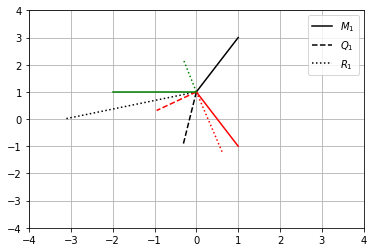

In [48]:
# plotting:

color = 'krg'

cols = np.shape(A)[1]
for i in range(0,cols):
    
    # plot the original matrix
    plt.plot([0,A[0,i]],[1,A[1,i]],color[i])
    
    # plot the orthogonalized vector(Q);
    if i<np.shape(Q)[1]: # plot only when the i < 2. we do this because Q is of shape 2x2 whereas other matrices are 2x3
        plt.plot([0,Q[0,i]],[1,Q[1,i]],color[i],linestyle='--')
        
    # plot the residual(R):
    plt.plot([0,R[0,i]],[1,R[1,i]],color[i],linestyle=':')
    
# legend
plt.legend(['$M_1$','$Q_1$','$R_1$'])
    
# decorating the plot
# plt.axis('square')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.grid()
    

        
plt.show()    
        
    

# exploration,analysis and freethrows

In [31]:
np.shape(A)

In [34]:
A

array([[ 1,  1, -2],
       [ 3, -1,  1]])

In [33]:
A[0,0]

1

In [35]:
A[1,0]

3

In [37]:
np.shape(Q)

# conclusion:
1. **There will always be the sign uncertainty about the perpendicular vectors. we just know that the orthogonal matrix is going to have column vectors that are perpendicular(orthogonal) to the original matrix vectors but, a big butt, it can be perpendicular `in any direction`, so it can be in the positive direction or negative direction, that is always uncertain.**
----
2. Q and A are orthogonal to each other.
----
3. R is just residual using which we can get back the A even after orthogonalization is done. so, there is no information loss or shoving the information to oblivion during transformation.

# day 245.day249

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# Goal: Create Gram-schmidt algorithm to compute Q.

1. start with a square matrix.
2. check Q^T.Q = I
3. verify the Q from gram-schmidt == Q from QR function in linalg.
4. Test also for rectangular matrix.

In [10]:
# 1. start with square matrix
m = np.random.randint(1,9,(3,3))

# gram_schmidt algorithm:
q_matrix = np.zeros(np.shape(m))

# initializing the 1st col
q_matrix[:,0] = 1/np.linalg.norm(m[:,0]) * m[:,0]

# building the subsequent cols using a for loop for scalability:
col_length = np.shape(q_matrix)[1]
for i in range(1,col_length):
    cur_col = m[:,i]
    unprocessed_q = m[:,i]
    
    for j in range(i):
        prev_col = q_matrix[:,j]
        unprocessed_q = unprocessed_q - (prev_col.T@cur_col)/(prev_col.T@prev_col) *prev_col
    
    # finally normalizing
    q = 1/np.linalg.norm(unprocessed_q) * unprocessed_q
        
    # updating the q_matrix
    q_matrix[:,i] = q
    
q_matrix

array([[ 9.27172650e-01,  6.28036983e-16, -3.74634325e-01],
       [ 2.64906471e-01,  7.07106781e-01,  6.55610068e-01],
       [ 2.64906471e-01, -7.07106781e-01,  6.55610068e-01]])

In [11]:
# 2. check q.T@q = I

q_matrix.T@q_matrix # no it is not exactly I

array([[ 1.00000000e+00,  7.69034948e-16,  8.81428917e-16],
       [ 7.69034948e-16,  1.00000000e+00, -1.45089523e-15],
       [ 8.81428917e-16, -1.45089523e-15,  1.00000000e+00]])

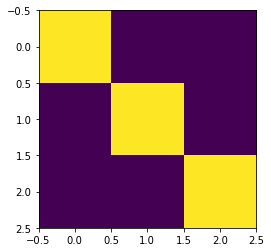

In [12]:
plt.imshow(q_matrix.T@q_matrix)
plt.show()

In [13]:
# 3. verify the Q from gram-schmidt == Q from np.linalg.qr(matrix,'complete')

bin_q_matrix,bin_r_matrix = np.linalg.qr(m,'complete')
bin_q_matrix

array([[-0.92717265,  0.        , -0.37463432],
       [-0.26490647, -0.70710678,  0.65561007],
       [-0.26490647,  0.70710678,  0.65561007]])

In [22]:
# 4. verify also for rectangular matrix:
m = np.random.randint(1,9,(3,4))

# gram_schmidt algorithm:
q_matrix = np.zeros(np.shape(m))

# initializing the 1st col
q_matrix[:,0] = 1/np.linalg.norm(m[:,0]) * m[:,0] 

# building the subsequent cols using a for loop for scalability:
col_length = np.shape(q_matrix)[1]
for i in range(1,col_length):
    cur_col = m[:,i]
    unprocessed_q = m[:,i]
    
    for j in range(i):
        prev_col = q_matrix[:,j]
        unprocessed_q = unprocessed_q - (prev_col.T@cur_col)/(prev_col.T@prev_col) *prev_col
    
    # finally normalizing
    q = 1/np.linalg.norm(unprocessed_q) * unprocessed_q
        
    # updating the q_matrix
    q_matrix[:,i] = q
    
q_matrix

array([[ 0.14002801,  0.96637494, -0.21566555,  0.70710678],
       [ 0.98019606, -0.16609569, -0.10783277,  0.70710678],
       [ 0.14002801,  0.19629491,  0.97049496,  0.        ]])

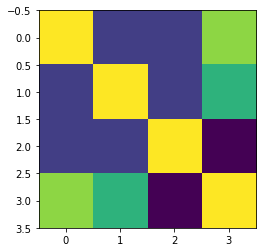

In [23]:
plt.imshow(q_matrix.T@q_matrix)

In [24]:
bin_q_matrix,bin_r_matrix = np.linalg.qr(m,'complete')
bin_q_matrix

array([[-0.14002801,  0.96637494, -0.21566555],
       [-0.98019606, -0.16609569, -0.10783277],
       [-0.14002801,  0.19629491,  0.97049496]])

# exploration,analysis and freethrows

In [22]:
bin_q_matrix[:,0].T@bin_q_matrix[:,1]

In [21]:
q_matrix[:,0].T@q_matrix[:,1]

In [49]:
cur_col = m[:,1]
prev_col = 1/np.linalg.norm(m[:,0]) * m[:,0]

q_cur_col = cur_col - (prev_col.T@cur_col)/(prev_col.T@prev_col) * (prev_col)

1/np.linalg.norm(q_cur_col) * q_cur_col

array([ 0.65508557, -0.71930965, -0.23120667])

In [48]:
cur_col = m[:,0]
cur_col,cur_col.copy()

(array([8, 6, 4]), array([8, 6, 4]))

# conclusion:

* signs of our manual q matrix was polorized to that of q matrix form in-built qr method. But it turned out that this sign uncertainty is so inherent in linear subspaces when doing transformation.
* for a rectangular matrix, there is some debris at the edge; the last column must not have been included but it is causing non-identity matrix when the q_matrix is transposed and matmultplied with q.

# Matrix Inverse via QR decomposition:

# $$ A = QR  $$

# $$ \rightarrow \text{ where, A,Q,R are square matrices.} $$

# $$ A^{-1} = (QR)^{-1} $$

# $$ A^{-1} = R^{-1} Q^{-1} $$

# $$ A^{-1} = R^{-1}Q^{T} $$

In [28]:
# prove A = QR

A = np.random.randint(1,9,(3,3))

Q,R = np.linalg.qr(A,'complete')

rhs = Q@R

lhs = A

display(lhs,rhs)

array([[1, 8, 4],
       [1, 4, 6],
       [2, 4, 1]])

array([[1., 8., 4.],
       [1., 4., 6.],
       [2., 4., 1.]])

In [29]:
# prove Q^-1 = Q^T

lhs = np.linalg.inv(Q)
rhs = Q.T

display(lhs,rhs)

array([[-0.40824829, -0.40824829, -0.81649658],
       [ 0.86164044,  0.12309149, -0.49236596],
       [ 0.30151134, -0.90453403,  0.30151134]])

array([[-0.40824829, -0.40824829, -0.81649658],
       [ 0.86164044,  0.12309149, -0.49236596],
       [ 0.30151134, -0.90453403,  0.30151134]])

# conclusion:

*  if the matrix is orthogonal, then the transpose of the orthogonal matrix is = inverse of the orthogonal matrix.

In [30]:
# find the inverse of A via QR decomposition. prove A^{-1} = R^{-1}Q^{T}

lhs = np.linalg.inv(A)
rhs = np.linalg.inv(R)@Q.T

display(lhs,rhs)

array([[-0.38461538,  0.15384615,  0.61538462],
       [ 0.21153846, -0.13461538, -0.03846154],
       [-0.07692308,  0.23076923, -0.07692308]])

array([[-0.38461538,  0.15384615,  0.61538462],
       [ 0.21153846, -0.13461538, -0.03846154],
       [-0.07692308,  0.23076923, -0.07692308]])

# code challenge:

## goal:
1. create a large 100*100 matrix.
2. find its inverse via normal method and name it as lhs
3. find its inverse via QR decomposition(using Q and R) and name it rhs.
4. plot both side by side.


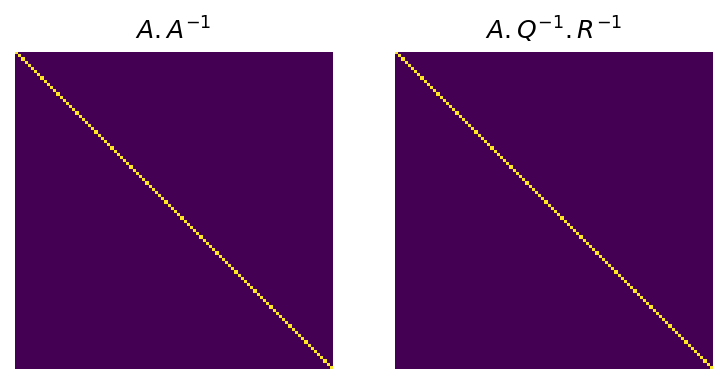

In [53]:
# create a large 100*100 matrix
A = np.random.rand(100,100) # it needs to be square otherwise you can't find inverse for it.

# inverse via normal method
lhs = np.linalg.inv(A)

# inverse using Q and R.
Q,R = np.linalg.qr(A,'complete')
rhs =  np.linalg.inv(R) @ np.linalg.inv(Q)

# plot them both side by side
fig,ax = plt.subplots(1,2,dpi=150)

ax[0].imshow(A@lhs)
ax[0].set_title('$ A.A^{-1} $')
ax[0].axis('off')

ax[1].imshow(A@rhs)
ax[1].set_title('$ A.Q^{-1}.R^{-1} $')
ax[1].axis('off')


plt.show()

# day 254,day 258

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# SHERMAN-MORRISON FORMULA

# code challenge:

1. prove this claim
2. find a failing condition.
3. implement an example in code.

$$ A = I - ab^{T} $$

$$ A^{-1} = I + \frac{ab^{T}}{1-a^{T}b} $$


## 1. To prove that the second equation is the inverse of the first equation.
* you must know that A.A{inv} = I so the if the second equation is indeed the inverse of the first then A.A{inv} must give identity matrix.
* a and b are column vectors.
*  I = 1
* b.T a = a.T b (commutative nature of dot products).

![sdfsfs](images/11_12_23.png) 


## 2. find a failing condition.
* the condtion fails when a^{T}b = 1 making the denominator go zero.
* to get a^{T}b = 1:
   1. first uniformalize the a by dividing each of its component by its total magnitude: a/np.linalg.norm(a).
   2. make b = a.
   
   
 ## 3. deep understanding about the magnitude of a vector.
$$ \text{magnitude } = \sqrt{a^{T} . a} $$
$$ \text{magnitude }  =  \sum_{i=0}^{n} a_{i}a_{i} $$
$$ \text{magnitude } = c = \sqrt{a^{2} + b^{2} } $$
  

In [49]:
# nomenclatures and their meanings
"""
1. let s stand for A
2. let t stand for A^{-1}

"""
# preparing the ingredients
m = 5 # determines the rows
a = np.random.randint(1,9,(m,1))
b = np.random.randint(1,9,(m,1))
I = np.eye(m)


A = I - (a@b.T)
A_inv = I + (a@b.T/(1-a.T@b))


# if t is the inverse of s then s@t must be = I. lets check!!!
A@A_inv

array([[ 1.00000000e+00, -1.77635684e-15,  1.77635684e-15,
         2.66453526e-15,  7.10542736e-15],
       [ 4.44089210e-16,  1.00000000e+00,  4.44089210e-16,
         6.66133815e-16,  1.77635684e-15],
       [ 8.88178420e-16, -8.88178420e-16,  1.00000000e+00,
        -4.44089210e-16,  0.00000000e+00],
       [ 4.44089210e-16,  0.00000000e+00, -4.44089210e-16,
         1.00000000e+00,  0.00000000e+00],
       [ 1.36002321e-15, -4.16333634e-16, -1.11022302e-16,
         2.01227923e-15,  1.00000000e+00]])

# exploration, analysis and freethrows

In [50]:
a

array([[8],
       [2],
       [4],
       [1],
       [3]])

In [51]:
b

array([[8],
       [8],
       [7],
       [4],
       [8]])

In [59]:
I

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [60]:
a@b.T

array([[64, 64, 56, 32, 64],
       [16, 16, 14,  8, 16],
       [32, 32, 28, 16, 32],
       [ 8,  8,  7,  4,  8],
       [24, 24, 21, 12, 24]])

In [52]:
s

array([[ -2., -12., -15., -18., -21.],
       [ -1.,  -3.,  -5.,  -6.,  -7.],
       [ -8., -32., -39., -48., -56.],
       [ -7., -28., -35., -41., -49.],
       [ -5., -20., -25., -30., -34.]])

In [53]:
t

array([[ 0.97560976, -0.09756098, -0.12195122, -0.14634146, -0.17073171],
       [-0.00813008,  0.96747967, -0.04065041, -0.04878049, -0.05691057],
       [-0.06504065, -0.2601626 ,  0.67479675, -0.3902439 , -0.45528455],
       [-0.05691057, -0.22764228, -0.28455285,  0.65853659, -0.39837398],
       [-0.04065041, -0.16260163, -0.20325203, -0.24390244,  0.71544715]])

In [55]:
np.linalg.norm(a)

In [56]:
np.sqrt(a.T@a)

array([[9.69535971]])

In [57]:
# to get the unit vector (to get the a to have values between 0 and 1)
s = a/np.linalg.norm(a)

s 


array([[0.825137  ],
       [0.20628425],
       [0.4125685 ],
       [0.10314212],
       [0.30942637]])

In [58]:


s.T@s 

array([[1.]])

# day 258

In [2]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# code challenge: prove A.T @ A = R.T @ R (R from QR decomposition)


In [20]:
A = np.random.randint(1,9,(3,3))

Q,R = np.linalg.qr(A,'complete')

lhs = A.T@A
rhs = R.T@R

# exploration,analysis and freethrows

In [21]:
A

array([[6, 7, 4],
       [1, 6, 3],
       [1, 7, 1]])

In [22]:
R

array([[-6.164414  , -8.92217816, -4.54219979],
       [ 0.        , -7.37527876, -1.69128308],
       [ 0.        ,  0.        , -1.58366113]])

In [23]:
lhs

array([[ 38,  55,  28],
       [ 55, 134,  53],
       [ 28,  53,  26]])

In [24]:
rhs

array([[ 38.,  55.,  28.],
       [ 55., 134.,  53.],
       [ 28.,  53.,  26.]])

# Rigorous formal proof for why A.T@A = R.T@R

$$ A = QR $$
$$ \downarrow $$
$$ A^{T} = (QR)^{T} $$
$$ \downarrow $$ 
$$ A^{T}.A = (QR)^{T}.A $$
$$ \downarrow $$
$$ A^{T}.A = (Q^{T} R^{T} ).A $$
$$ \downarrow $$ 
$$ A^{T}.A = R^{T} (Q^{T}.A) $$
$$ \downarrow $$
$$ A^{T}.A = R^{T}.R $$
$$ \text{Hence proved!!! } $$

In [27]:
A

array([[6, 7, 4],
       [1, 6, 3],
       [1, 7, 1]])

In [28]:
Q@R

array([[6., 7., 4.],
       [1., 6., 3.],
       [1., 7., 1.]])

In [30]:
R

array([[-6.164414  , -8.92217816, -4.54219979],
       [ 0.        , -7.37527876, -1.69128308],
       [ 0.        ,  0.        , -1.58366113]])

In [29]:
Q.T@A

array([[-6.16441400e+00, -8.92217816e+00, -4.54219979e+00],
       [-2.22044605e-16, -7.37527876e+00, -1.69128308e+00],
       [ 0.00000000e+00, -5.55111512e-16, -1.58366113e+00]])

In [31]:
Q.T@Q

array([[1.00000000e+00, 1.36395768e-18, 4.87547014e-18],
       [1.36395768e-18, 1.00000000e+00, 1.34476688e-16],
       [4.87547014e-18, 1.34476688e-16, 1.00000000e+00]])

# day 267

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# practice

In [65]:
a = np.random.randint(1,9,(5,2))
a

array([[3, 5],
       [2, 7],
       [1, 1],
       [6, 5],
       [7, 2]])

In [66]:
q,r = np.linalg.qr(a,'complete')
q

array([[-0.30151134, -0.39520418, -0.10114134, -0.59074117, -0.62745507],
       [-0.20100756, -0.78896073, -0.0212933 ,  0.01804357,  0.57996375],
       [-0.10050378, -0.03619086,  0.99217116, -0.04525875, -0.0462304 ],
       [-0.60302269, -0.07382935, -0.04650254,  0.7193838 , -0.33352261],
       [-0.70352647,  0.463243  , -0.05244933, -0.36212966,  0.39568625]])

In [67]:
q.shape,r.shape

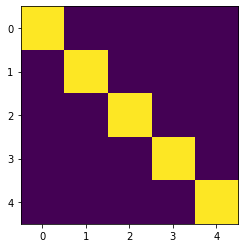

In [69]:
plt.imshow(q.T@q)

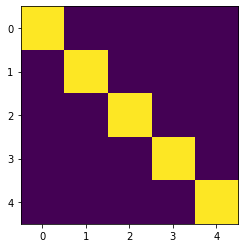

In [70]:
plt.imshow(q@q.T)

In [ ]:
# what is the advantage of having q be a square matrix not a rectangular one as the original matrix?
"""
R matrix (the residuals) is possible only if the shape of the q is square if it was of same shape as the original matrix
(5,2) then q.T@a => (2,5) @ (5,2)
"""

In [71]:
# lets get to have q be the same size as the original matrix

q,r = np.linalg.qr(a)
q

array([[-0.30151134, -0.39520418],
       [-0.20100756, -0.78896073],
       [-0.10050378, -0.03619086],
       [-0.60302269, -0.07382935],
       [-0.70352647,  0.463243  ]])

In [72]:
q.T@q

array([[ 1.00000000e+00, -1.35999481e-17],
       [-1.35999481e-17,  1.00000000e+00]])

In [73]:
q@q.T

array([[ 0.24709544,  0.37240664,  0.04460581,  0.21099585,  0.02904564],
       [ 0.37240664,  0.66286307,  0.04875519,  0.17946058, -0.22406639],
       [ 0.04460581,  0.04875519,  0.01141079,  0.06327801,  0.05394191],
       [ 0.21099585,  0.17946058,  0.06327801,  0.36908714,  0.39004149],
       [ 0.02904564, -0.22406639,  0.05394191,  0.39004149,  0.70954357]])

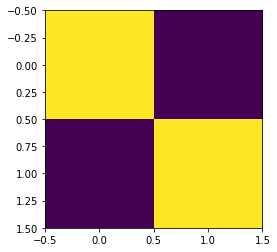

In [74]:
plt.imshow(q.T@q)

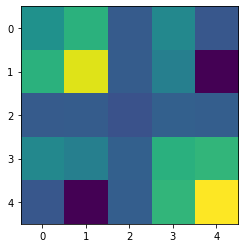

In [75]:
plt.imshow(q@q.T);

# conclusion:
* 'complete' makes the q matrix be a square and it makes it give identity matrix both when q.T@q and q@q.T this is the advantage of having it square so that the q matrix makes the calculation more flexible makeing the order of multiplication redundant.